key_knowledge
- Total Cancelation
-- Cancelation by
- rooms
- month Cancelation
- year Cancelation
- Booking Channel


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statistics as st

In [2]:
df=pd.read_csv("Hotel Reservations.csv")

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

EDA

In [6]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [7]:
df['booking_status'].value_counts(normalize=True)*100

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64

<Axes: xlabel='booking_status', ylabel='count'>

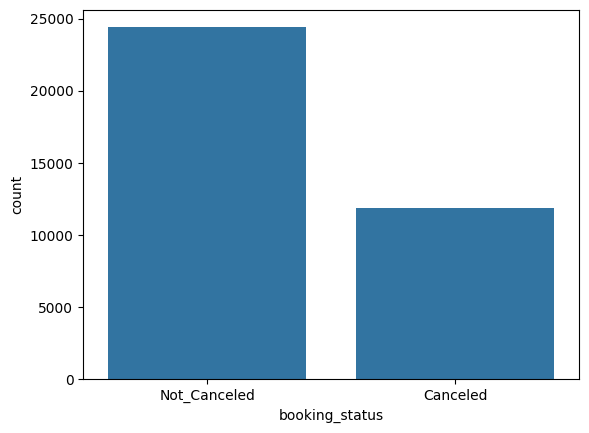

In [8]:
sns.countplot(df, x='booking_status')

<Axes: xlabel='room_type_reserved', ylabel='count'>

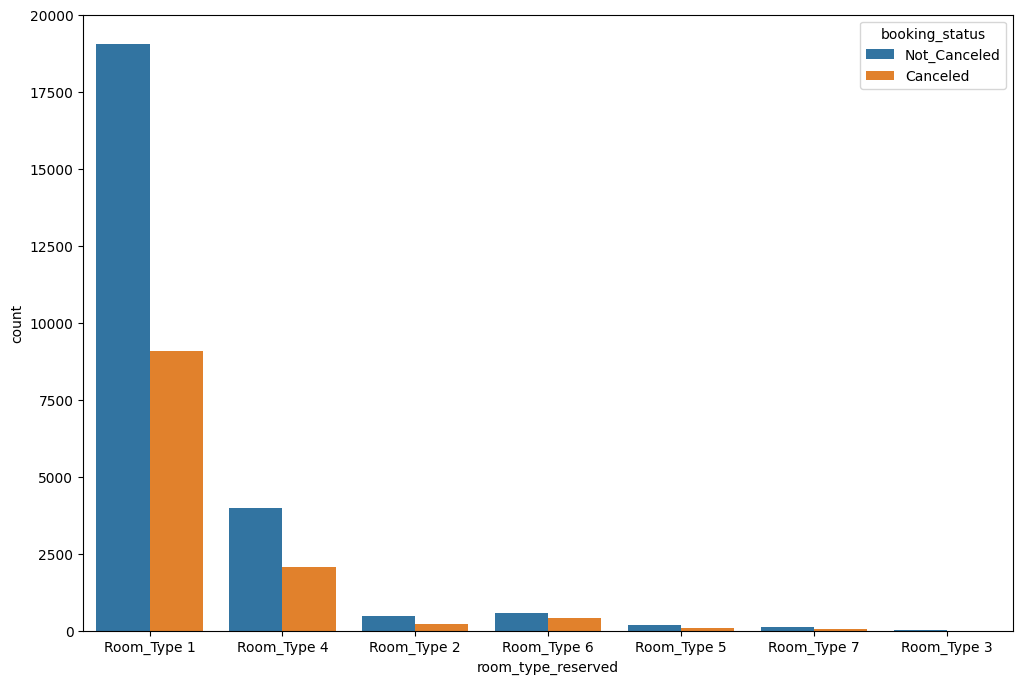

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(df, x='room_type_reserved', hue='booking_status')

<Axes: xlabel='required_car_parking_space', ylabel='count'>

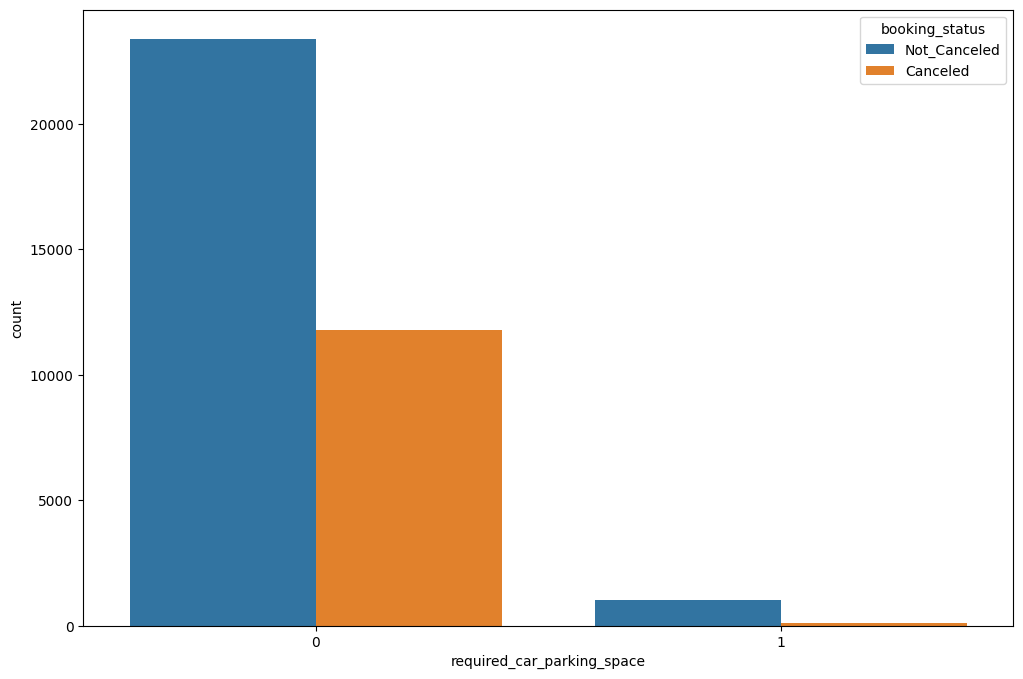

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df, x='required_car_parking_space', hue='booking_status')

<Axes: xlabel='market_segment_type', ylabel='count'>

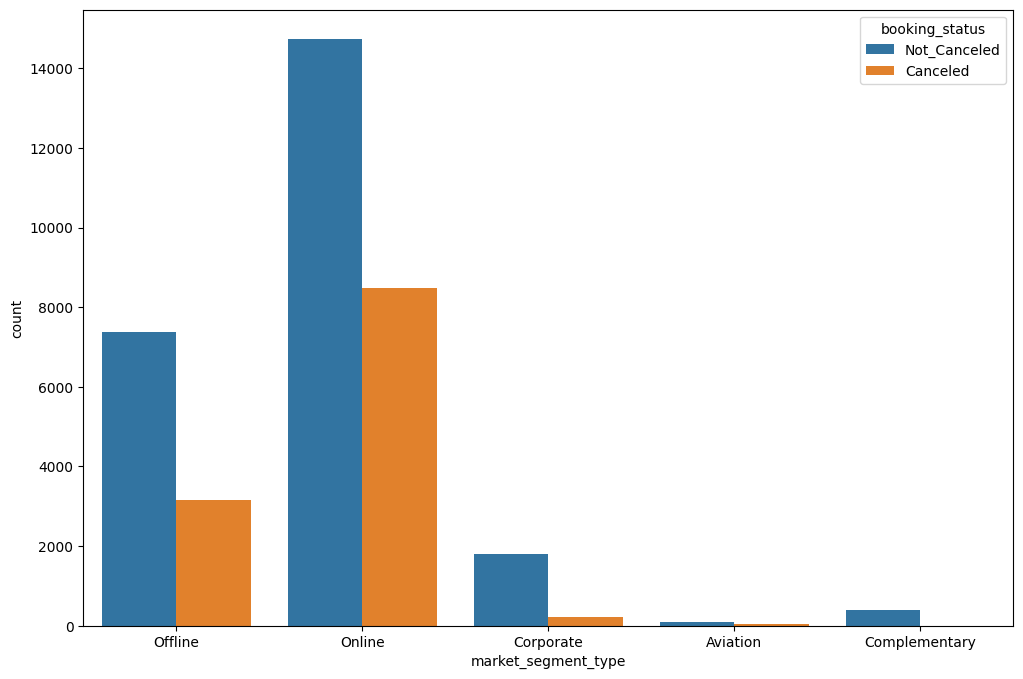

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(df, x='market_segment_type', hue='booking_status')

<Axes: xlabel='arrival_year', ylabel='count'>

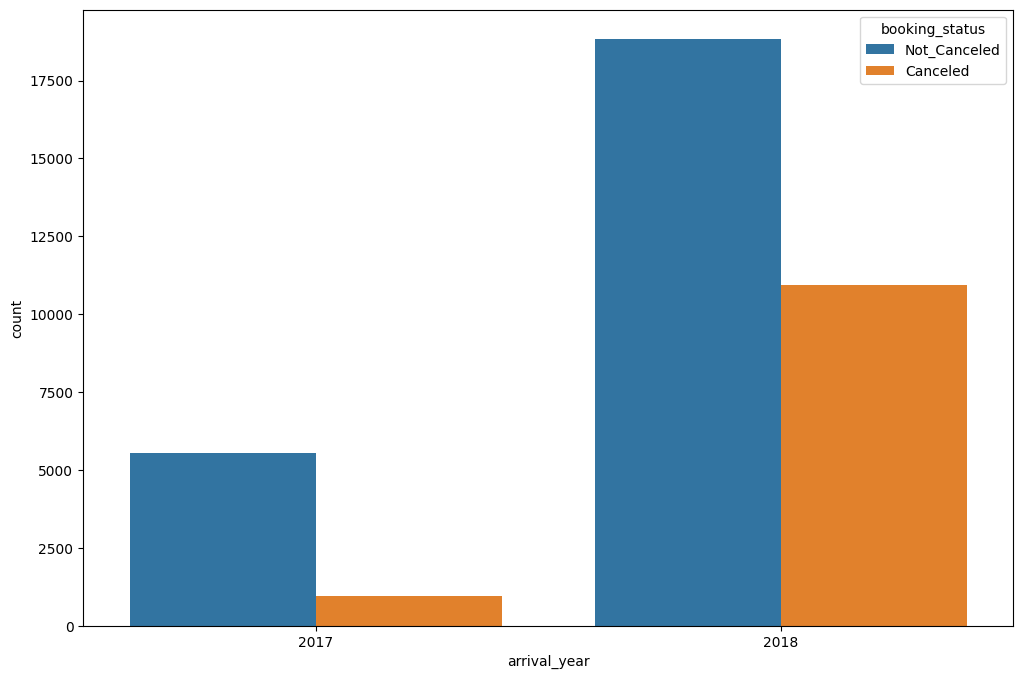

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(df, x='arrival_year', hue='booking_status')

<Axes: xlabel='arrival_month', ylabel='count'>

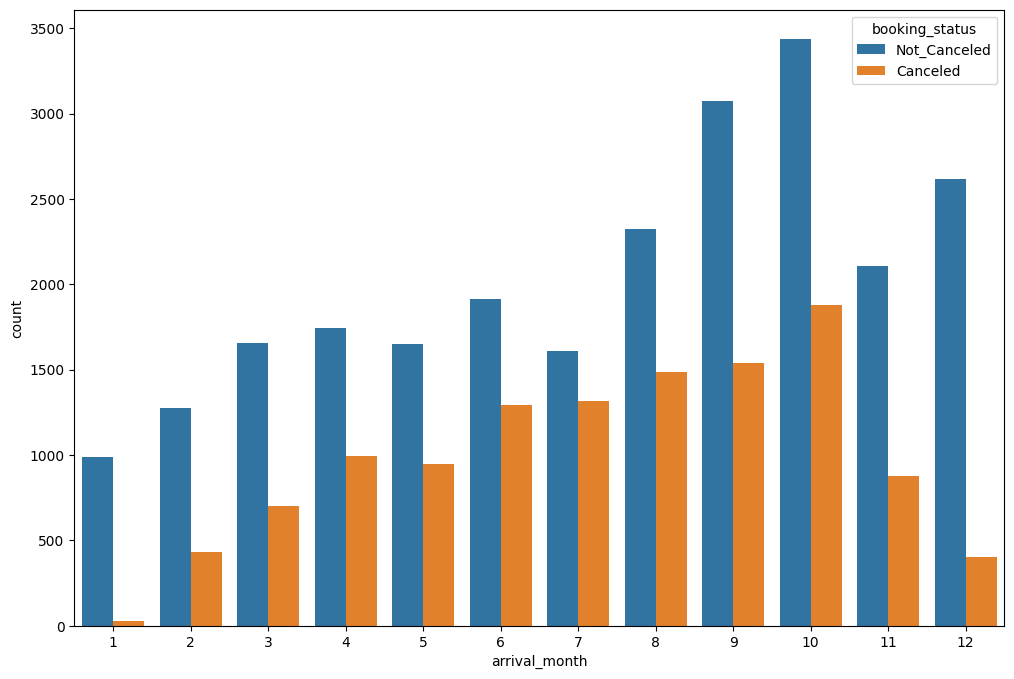

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(df, x='arrival_month', hue='booking_status')

In [14]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

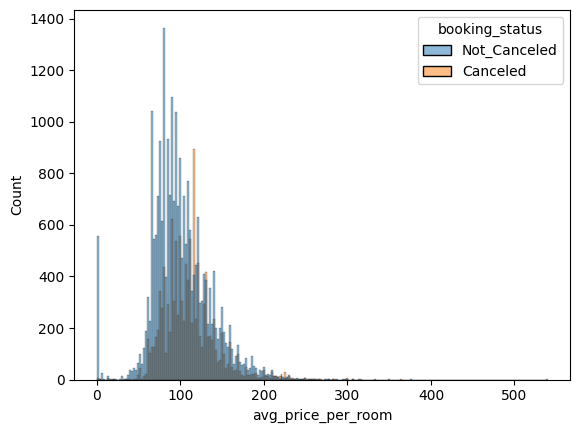

In [15]:
sns.histplot(x='avg_price_per_room', hue='booking_status' , data=df)

C:\Users\Maqsood Ahmad\AppData\Local\Temp\ipykernel_2364\1749762047.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth= sns.kdeplot(df.avg_price_per_room[(df['booking_status'] == 'Canceled')], color='red', shade=True)
C:\Users\Maqsood Ahmad\AppData\Local\Temp\ipykernel_2364\1749762047.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth= sns.kdeplot(df.avg_price_per_room[(df['booking_status'] == 'Not_Canceled')], color='blue', shade=True)


Text(0.5, 1.0, 'Room Charges by Cancelation')

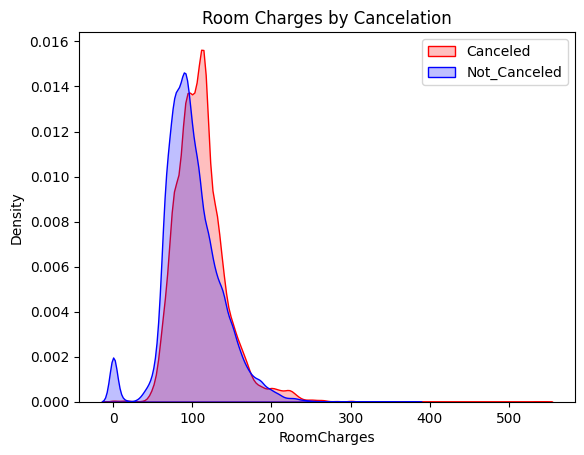

In [29]:
mth= sns.kdeplot(df.avg_price_per_room[(df['booking_status'] == 'Canceled')], color='red', shade=True)
mth= sns.kdeplot(df.avg_price_per_room[(df['booking_status'] == 'Not_Canceled')], color='blue', shade=True)
mth.legend(['Canceled','Not_Canceled'], loc='upper right')
mth.set_xlabel('RoomCharges')
mth.set_ylabel('Density')
mth.set_title('Room Charges by Cancelation')

In [16]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()

In [18]:
df['status']=model.fit_transform(df['booking_status'])

In [19]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,0


In [20]:
df_new=df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room','status']]

In [21]:
df_new.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,status
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,-0.192277,-0.047426,-0.119166,0.296886,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,-0.036348,-0.016390,-0.021189,0.337728,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,-0.067107,-0.020690,-0.026312,-0.004525,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,-0.099764,-0.030080,-0.049344,0.022753,-0.092996
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.110909,0.027106,0.063810,0.061304,0.086185
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,-0.135984,-0.045723,-0.078137,-0.062596,-0.438538
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,1.000000,0.390810,0.539156,-0.174900,0.107287
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,0.027106,-0.045723,0.390810,1.000000,0.468147,-0.063340,0.033728
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,0.063810,-0.078137,0.539156,0.468147,1.000000,-0.113684,0.060179
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,0.061304,-0.062596,-0.174900,-0.063340,-0.113684,1.000000,-0.142569


<Axes: >

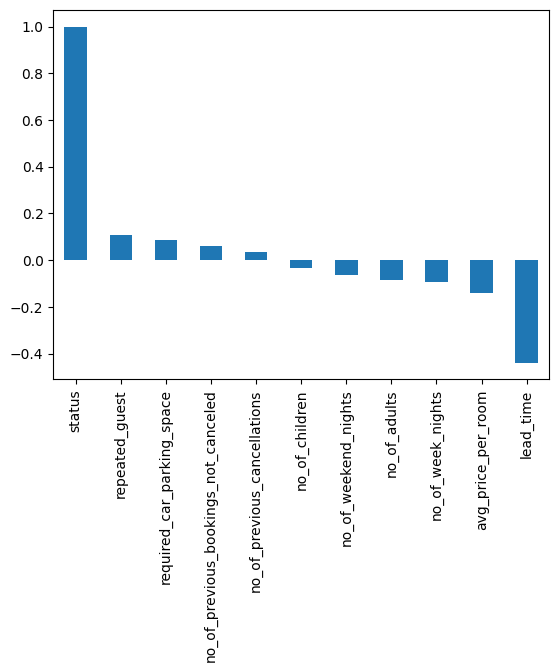

In [22]:
df_new.corr()['status'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

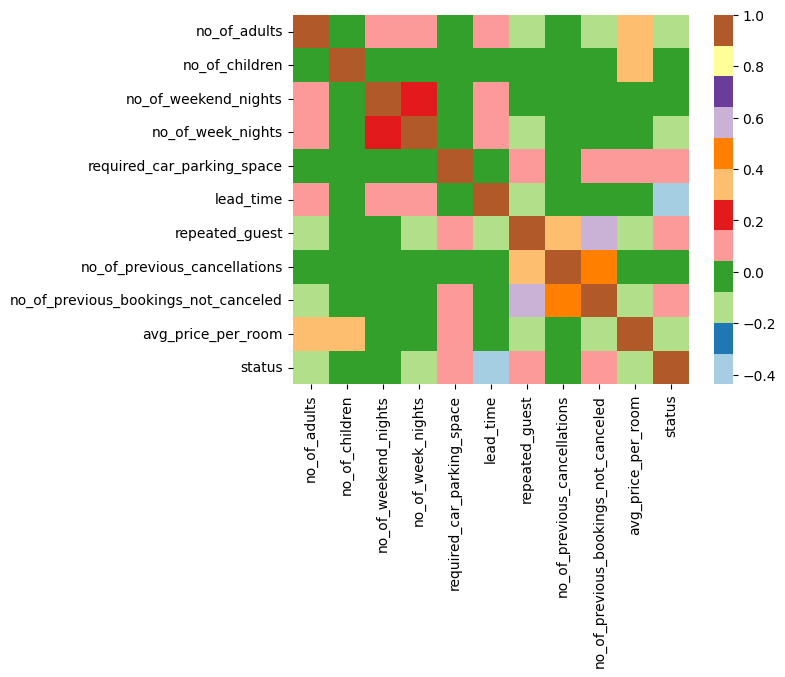

In [23]:
sns.heatmap(df_new.corr(), cmap='Paired')